In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import cv2
import pathlib

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url="/content/drive/MyDrive/mood/train"

In [ ]:
url=pathlib.Path(url)

In [ ]:
data={"angry":list(url.glob("angry/*")),
      "disgusted":list(url.glob("disgusted/*")),
      "fearful":list(url.glob("fearful/*")),
      "happy":list(url.glob("happy/*")),
      "neutral":list(url.glob("neutral/*")),
      "sad":list(url.glob("sad/*")),
      "surprised":list(url.glob("surprised/*"))
      }

In [ ]:
data_index={"angry":0,
            "disgusted":1,
            "fearful":2,
            "happy":3,
            "neutral":4,
            "sad":5,
            "surprised":6
            }

In [ ]:
x,y=[],[]
for name,lis in data.items():
  for l in lis:
    img_array=cv2.imread(str(l))
    img_res=cv2.resize(img_array,(224,224))
    x.append(img_res)
    y.append(data_index[name])

In [ ]:
x=np.array(x)
y=np.array(y)

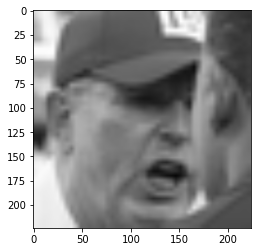

In [ ]:
plt.imshow(x[0])

In [ ]:
y[0]

0

In [ ]:
x=x/255

In [ ]:
x.shape

(3516, 224, 224, 3)

In [ ]:
y.shape

(3516,)

In [ ]:
data_augmentation=keras.Sequential(
    [
     keras.layers.experimental.preprocessing.RandomZoom(0.3),
     keras.layers.experimental.preprocessing.RandomContrast(0.2)
    ]
)

In [ ]:
import tensorflow_hub as hub

In [ ]:
model=keras.Sequential(
    [
     #data_augmentation,
     #keras.layers.Conv2D(filters=2,kernel_size=(3,3),padding="same",input_shape=(224,224,3)),
     #keras.layers.MaxPooling2D((2,2)),
     #keras.layers.Conv2D(filters=2,kernel_size=(3,3),padding="same"),
     #keras.layers.MaxPooling2D((2,2)),

     #keras.layers.Flatten(),
     #keras.layers.Dense(70,activation="relu"),
     #keras.layers.Dropout(0.2),
     #keras.layers.Dense(60,activation="relu"),
     #keras.layers.Dropout(0.3),
     #keras.layers.Dense(50,activation="relu"),
     #keras.layers.Dropout(0.5),
     hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5",trainable=False,input_shape=(224,224,3)),
     keras.layers.Dense(7,activation="softmax")
     
     
    ]
)
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x,y,epochs=30)

Epoch 1/30
110/110 [==============================] - 48s 399ms/step - loss: 1.9061 - accuracy: 0.2358
Epoch 2/30
110/110 [==============================] - 44s 399ms/step - loss: 1.6257 - accuracy: 0.3871
Epoch 3/30
110/110 [==============================] - 44s 397ms/step - loss: 1.5463 - accuracy: 0.4185
Epoch 4/30
110/110 [==============================] - 44s 396ms/step - loss: 1.4688 - accuracy: 0.4545
Epoch 5/30
110/110 [==============================] - 44s 396ms/step - loss: 1.4536 - accuracy: 0.4661
Epoch 6/30
110/110 [==============================] - 43s 394ms/step - loss: 1.4014 - accuracy: 0.4765
Epoch 7/30
110/110 [==============================] - 45s 405ms/step - loss: 1.3664 - accuracy: 0.4939
Epoch 8/30
110/110 [==============================] - 44s 396ms/step - loss: 1.3651 - accuracy: 0.5059
Epoch 9/30
110/110 [==============================] - 43s 395ms/step - loss: 1.3336 - accuracy: 0.5173
Epoch 10/30
110/110 [==============================] - 43s 395ms/step - l

In [ ]:
model.save_weights("emotion.h5")

In [ ]:
file=open("emotion.json","w")
file.write(model.to_json())
file.close()

In [ ]:
from google.colab import files

In [ ]:
files.download("/content/emotion.h5")
files.download("/content/emotion.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>